# Magnetotelluric Phase Tensor ellipse

* A conventional magnetotelluric (MT) survey layout implies measurements of horizontal electric and magnetic fields at every site with subsequent estimation and interpretation of impedance tensors Z.
* Where galvanic effects produced by heterogeneities in near-surface conductivity distort the regional MT response thus giving us false impedence resposnses, the phase tensor however preserves the regional phase information. 
* Calculation of the phase tensor requires no assumption about the dimensionality of the underlying conductivity distribution and is applicable where both the heterogeneity and regional structure are 3-D.
* The phase tensor can be depicted graphically as an ellipse, the major and minor axes representing the principal axes of the tensor. 
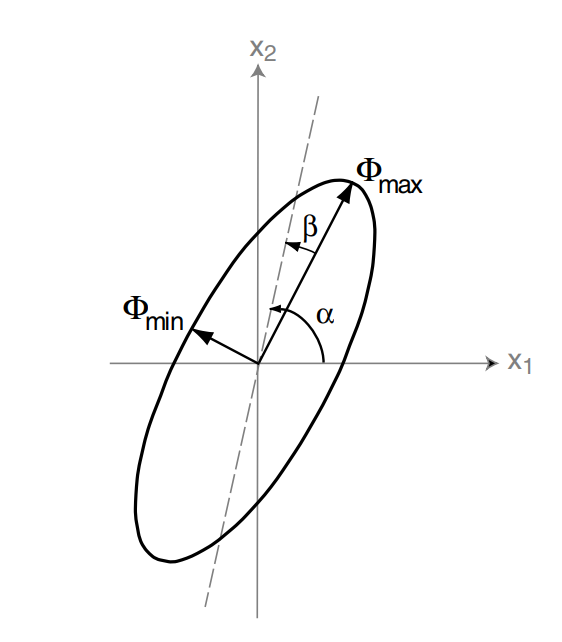

###### Formula used:
1. impedance: Z = X + iY
2. Impedance tensor:
    $$ \begin{bmatrix}Z_{11} & Z_{12} \\
                   Z_{21} & Z_{22}
   \end{bmatrix}$$
   <br>
Create a separate matrix of real componet X and imaginary component Y from Impedance tensor.
3. Phase tensor:
$$
\phi = X^{-1}Y \\
\phi =
\begin{bmatrix}\phi_{11} & \phi_{12} \\
                 \phi_{21} & \phi_{22}
\end{bmatrix}
$$
4. Trace: 
$$ tr(\phi) = \phi_{11} + \phi_{22}$$
5. Skew:
$$ sk(\phi) = \phi_{12} - \phi_{21}$$
6. Determinant:
$$ det(\phi) = \phi_{11}*\phi_{22} - \phi_{12}*\phi_{21}$$
<br>
7. $$\phi_{1}=tr(\phi)/2 $$ <br>
8. $$\phi_{2}=det(\phi)^{0.5} $$<br>
9. $$\phi_{3}=sk(\phi)/2 $$<br>
10. $$\phi_{min}=[{\phi_{1}^{2}+\phi_{3}^{2}}]^{0.5}-[{\phi_{1}^{2}+\phi_{3}^{2}}-\phi_{2}^{2}]^{0.5}$$<br>
If det(Φ) < 0 then, defining  Φ2 = |det(Φ)|^(1/2) and assign a negative sign to the value of Φ_min.<br> <br>
11. $$\phi_{max}=[{\phi_{1}^{2}+\phi_{3}^{2}}]^{0.5}+[{\phi_{1}^{2}+\phi_{3}^{2}}-\phi_{2}^{2}]^{0.5}$$ <br>
12. $$ \alpha ={1/2}*\arctan[ ({\phi_{12}}+ {\phi_{12}}) \div ({\phi_{11}} - {\phi_{22}})] $$ <br>
13. $$ \beta ={1/2}*\arctan[ ({\phi_{11}}- {\phi_{22}}) \div ({\phi_{12}} + {\phi_{21}})] $$  <br>
14. $$ \theta=\alpha-\beta $$

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('21MC0100.csv')
df

,Stat,X-cord(m),Y-cord(m),Period(s),R(Zxx),I(Zxx),R(Zxy),I(Zxy),R(Zyx),I(Zyx),R(Zyy),I(Zyy)
0,1,-46875,-46875,0.1000,0.01511,0.008800,12050.0,-7503.0,-12040.0,7499.0,-0.01436,-0.008925
1,1,-46875,-46875,0.3162,0.01345,0.003396,4758.0,-5587.0,-4758.0,5586.0,-0.01367,-0.003153
2,1,-46875,-46875,1.0000,0.01530,0.015430,2432.0,-2716.0,-2432.0,2715.0,-0.01561,-0.015830
3,1,-46875,-46875,3.1620,0.02325,0.035860,1367.0,-1457.0,-1366.0,1457.0,-0.02386,-0.036040
4,1,-46875,-46875,10.0000,0.03730,0.089320,768.2,-796.3,-767.9,796.5,-0.03838,-0.087720
...,...,...,...,...,...,...,...,...,...,...,...,...
2299,256,46875,46875,10.0000,-365.50000,-117.600000,4187.0,-4386.0,-4624.0,4334.0,391.70000,121.200000
2300,256,46875,46875,31.6200,-448.50000,-72.600000,2282.0,-2424.0,-2779.0,2393.0,474.50000,80.400000
2301,256,46875,46875,100.0000,-489.20000,-11.040000,1253.0,-1292.0,-1771.0,1339.0,517.50000,42.920000
2302,256,46875,46875,316.2000,-471.70000,84.420000,760.0,-660.9,-1187.0,811.7,560.30000,-28.460000


In [3]:
m=df['Period(s)'].unique()
m

array([1.000e-01, 3.162e-01, 1.000e+00, 3.162e+00, 1.000e+01, 3.162e+01,
       1.000e+02, 3.162e+02, 1.000e+03])

In [4]:
# f=0.1
df_01=df[::9].reset_index()
df_01.drop('index',axis=1,inplace=True)
# f=0.31
df_03=df[1::9].reset_index()
df_03.drop('index',axis=1,inplace=True)
# f=1
df_1=df[2::9].reset_index()
df_1.drop('index',axis=1,inplace=True)
# f=3.1
df_3=df[3::9].reset_index()
df_3.drop('index',axis=1,inplace=True)
# f=10
df_10=df[4::9].reset_index()
df_10.drop('index',axis=1,inplace=True)
# f=31.6
df_31=df[5::9].reset_index()
df_31.drop('index',axis=1,inplace=True)
# f=100
df_100=df[6::9].reset_index()
df_100.drop('index',axis=1,inplace=True)
# f=316
df_316=df[7::9].reset_index()
df_316.drop('index',axis=1,inplace=True)
# f=1000
df_1000=df[8::9].reset_index()
df_1000.drop('index',axis=1,inplace=True)


In [5]:
def function(data):
    
    x=[];y=[];x_inv=[];Ph_t=[]
    for i in range(256):
        x.append([[data['R(Zxx)'][i],data['R(Zxy)'][i]],[data['R(Zyx)'][i],data['R(Zyy)'][i]]])
        y.append([[data['I(Zxx)'][i],data['I(Zxy)'][i]],[data['I(Zyx)'][i],data['I(Zyy)'][i]]])
    
    for i in range(256):
        x_inv.append(np.linalg.inv(x[i]))
    for i in range(256):
        Ph_t.append(np.dot(x_inv[i],y[i])) # matrix multiplication to get phase tensor

    xx=[];xy=[];yx=[];yy=[]
    for i in range(256):
        xx.append(Ph_t[i][0][0])
        xy.append(Ph_t[i][0][1])
        yx.append(Ph_t[i][1][0])
        yy.append(Ph_t[i][1][1])
    
    data['Phi_xx']=xx
    data['Phi_xy']=xy
    data['Phi_yx']=yx
    data['Phi_yy']=yy
    
    # trace
    tr_phi=np.array(data['Phi_xx'])+np.array(data['Phi_yy'])
    # skew
    sk_phi=np.array(data['Phi_xy'])-np.array(data['Phi_yx'])
    # determinant
    det_phi=np.array(data['Phi_xx'])*np.array(data['Phi_yy'])-np.array(data['Phi_yx'])*np.array(data['Phi_xy'])
    
    phi_1=tr_phi/2
    phi_3=sk_phi/2
    
    phi_2=[];phi_min=[];phi_max=[]
    
    for i in range(256):
        if det_phi[i]<0:
            j = np.sqrt(np.abs(det_phi[i]))
            phi_min_ = -(np.sqrt(phi_1[i]**2+phi_3[i]**2)-np.sqrt(abs(phi_1[i]**2+phi_3[i]**2-det_phi[i])))
            phi_max_ = np.sqrt(phi_1[i]**2+phi_3[i]**2)+np.sqrt(phi_1[i]**2+phi_3[i]**2-det_phi[i])
        elif det_phi[i]>0:
            j = np.sqrt(det_phi[i])
            phi_min_ = np.sqrt(phi_1[i]**2+phi_3[i]**2)-np.sqrt(abs(phi_1[i]**2+phi_3[i]**2-det_phi[i]))
            phi_max_ = np.sqrt(phi_1[i]**2+phi_3[i]**2)+np.sqrt(abs(phi_1[i]**2+phi_3[i]**2-det_phi[i]))
        phi_2.append(j)
        phi_min.append(phi_min_)
        phi_max.append(phi_max_)
        
    beta=0.5*np.arctan(phi_3/phi_1)
    alpha=0.5*np.arctan((data['Phi_yx']+data['Phi_xy'])/(data['Phi_xx']-data['Phi_yy']))
    
    # direction of major axis of tensor ellipse
    theta=alpha-beta # in radian
    X=np.array(df_01['X-cord(m)']/1000)
    Y=np.array(df_01['Y-cord(m)']/1000)
    a=[phi_max,phi_min,theta,X,Y,data['Period(s)'][0]]
    return a

In [6]:
# Creating a plot with ellipse

def ellipse(a,b,theta,X,Y,Period):
    # a = phi_max , theta = angle of major axis wrt horizontal
    # b = phi_min
    
    x_=[]
    for i in range(len(a)):
        x_.append(np.linspace(-a[i],a[i],50))
    
    y_1=[];y_2=[]
    for j in range(len(a)):
        for k in range(len(b)):
            if j==k:
                for i in range(len(x_)):
                    if i==j:
                        y1=b[k]*np.sqrt(1-((x_[i])/a[j])**2)
                        y2=-b[k]*np.sqrt(1-((x_[i])/a[j])**2)
                y_1.append(y1)
                y_2.append(y2)
                
    y=[]
    for i in range(len(y_1)): y.append(list(y_1[i])+list(reversed(y_2[i])))
    x=[]  
    for i in range(len(x_)): x.append(list(x_[i])+list(reversed(list(x_[i]))))
    x=np.array(x)
    y=np.array(y)
    
    rot_m=[]
    for i in theta:
        rot=[[np.cos(i),-np.sin(i)],[np.sin(i),np.cos(i)]]
        rot_m.append(np.array(rot))

    el=[]
    for i in range(len(x)): el.append(np.array([x[i],y[i]]))

    el_rot=[]    
    for i in range(len(rot_m)):
        el_rot.append(np.dot(rot_m[i],el[i]))
    
    u=[];v=[]
    for i in range(256): 
        u.append((el_rot[i][0])+np.array(X[i])) # 
        v.append((el_rot[i][1])+np.array(Y[i]))  # 
   
    # Plotting an ellipse
    fig,ax=plt.subplots(figsize=(10,10))
    for i in range(256):
        ax.plot(u[i],v[i],color='k')
        
    for i in range(256):
        plt.arrow(X[i],Y[i],dx=a[i]*np.cos(theta[i]),dy=b[i]*np.sin(theta[i]),color='k')
        plt.arrow(X[i],Y[i],dx=-a[i]*np.cos(theta[i]),dy=-b[i]*np.sin(theta[i]),color='k')
    #plt.grid()
    ax.set_xlim(-50, 50)
    ax.set_ylim(-50, 50)
    ax.set_ylabel('Y-cord (Km)')
    ax.set_xlabel('X-cord (Km)')
    ax.set_title('Period = %s'%Period+" sec",fontsize=15)
    plt.show()

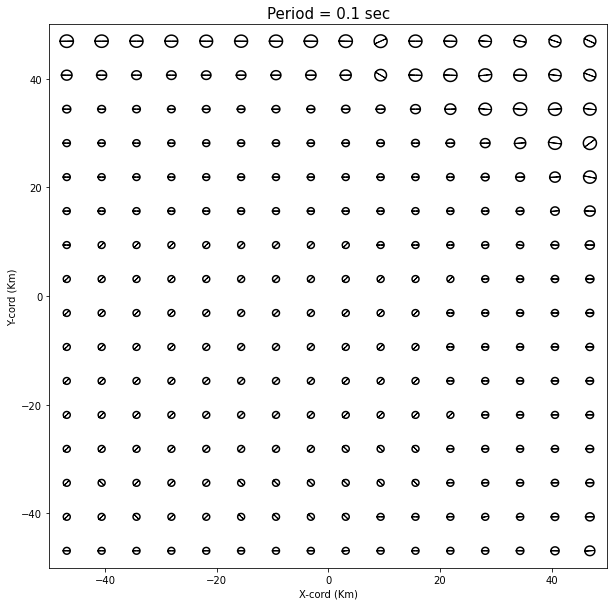

In [7]:
k=function(df_01)
ellipse(k[0],k[1],k[2],k[3],k[4],m[0])

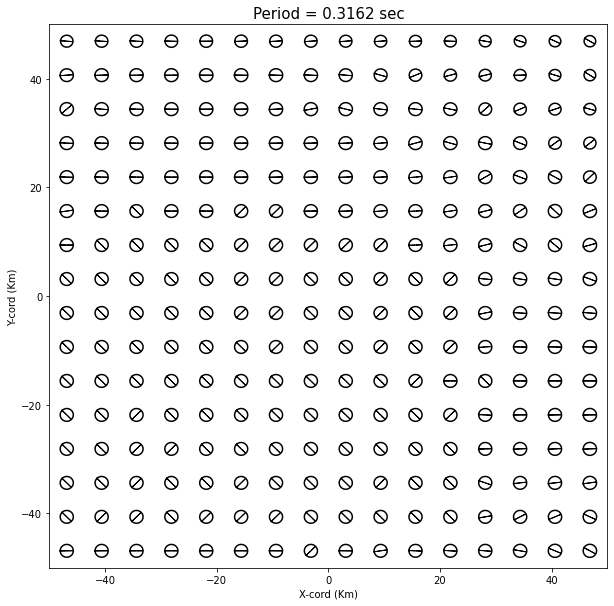

In [8]:
k=function(df_03)
ellipse(k[0],k[1],k[2],k[3],k[4],m[1])

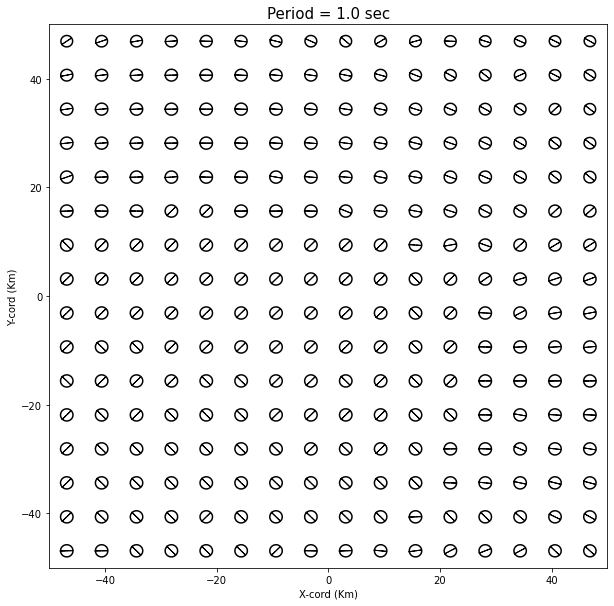

In [9]:
k=function(df_1)
ellipse(k[0],k[1],k[2],k[3],k[4],m[2])

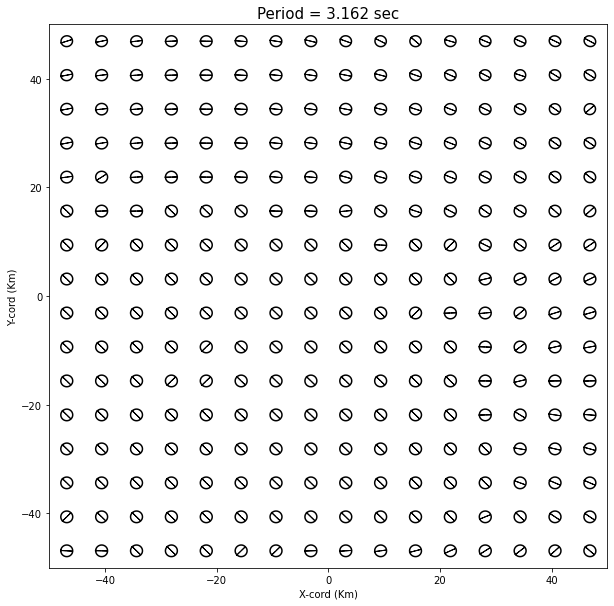

In [10]:
k=function(df_3)
ellipse(k[0],k[1],k[2],k[3],k[4],m[3])

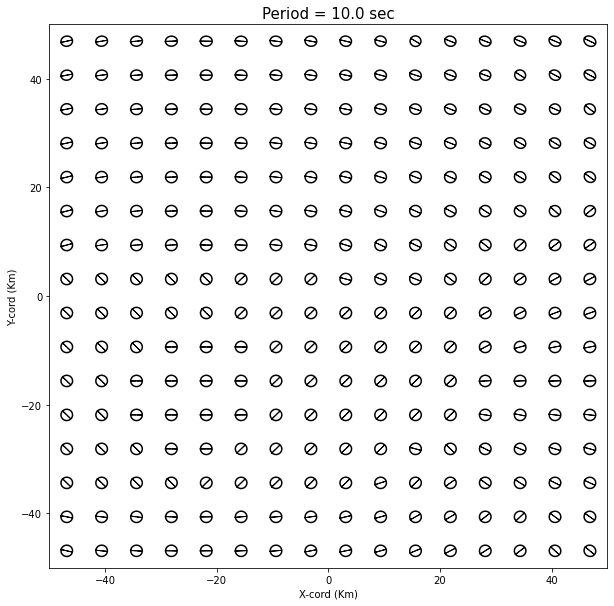

In [11]:
k=function(df_10)
ellipse(k[0],k[1],k[2],k[3],k[4],m[4])

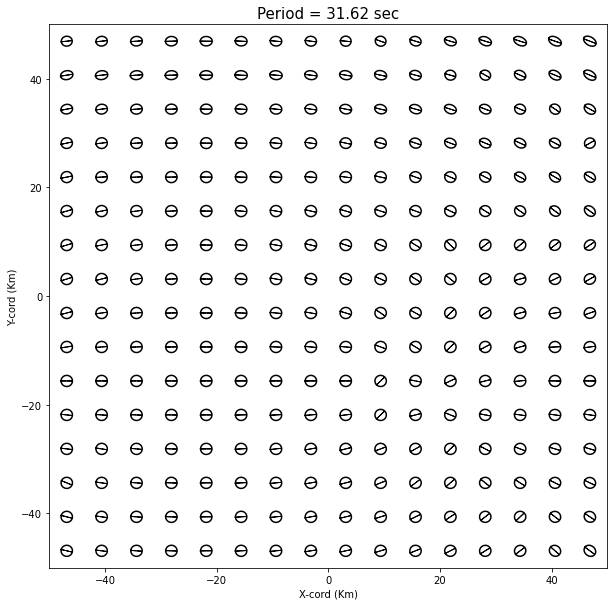

In [12]:
k=function(df_31)
ellipse(k[0],k[1],k[2],k[3],k[4],m[5])

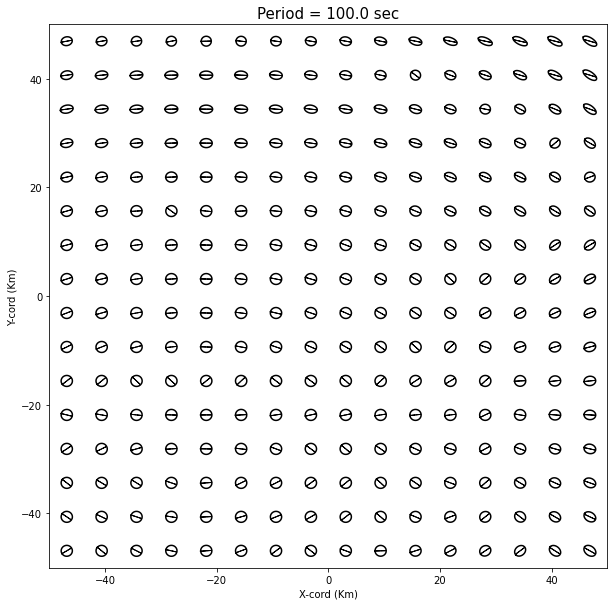

In [13]:
k=function(df_100)
ellipse(k[0],k[1],k[2],k[3],k[4],m[6])

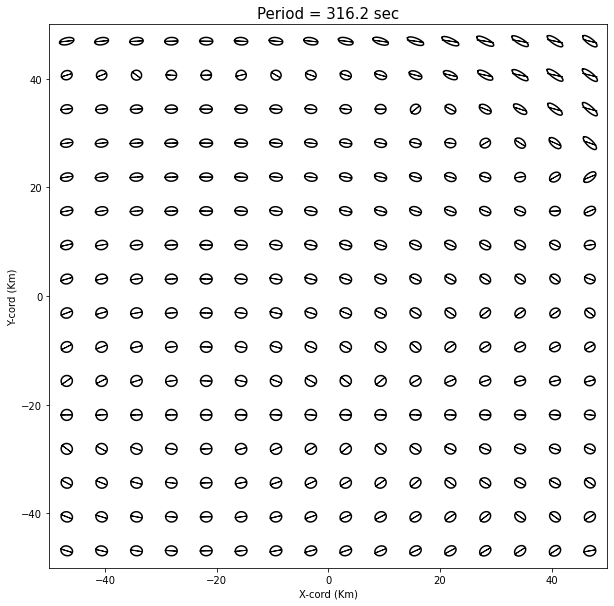

In [14]:
k=function(df_316)
ellipse(k[0],k[1],k[2],k[3],k[4],m[7])

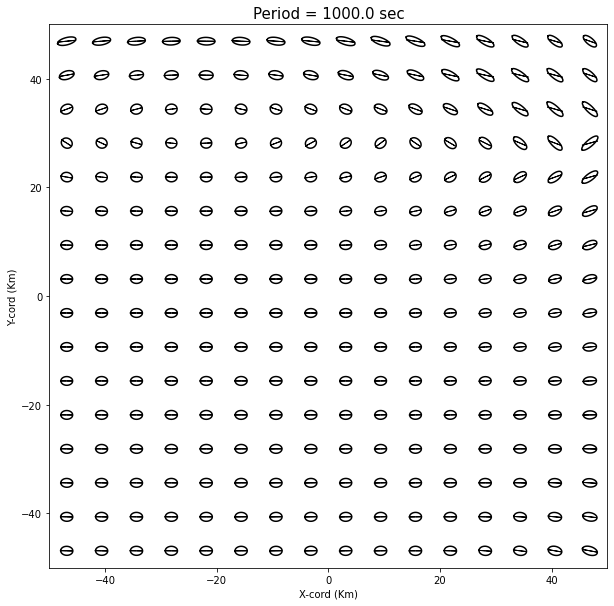

In [15]:
k=function(df_1000)
ellipse(k[0],k[1],k[2],k[3],k[4],m[8])